In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from pprint import pprint

In [330]:
end_files = glob('*end.out')

df_end = pd.concat([pd.read_csv(file, sep=' ') for file in end_files], ignore_index=True)
if len(end_files) > 1:
    df_end['particle'] = df_end['particle']+df_end['jobnumber']*df_end['particle'].max()
df_end.head()

,jobnumber,particle,tstart,xstart,ystart,zstart,vxstart,vystart,vzstart,polstart,...,Uend,solidend,stopID,Nspinflip,spinflipprob,Nhit,Nstep,trajlength,Hmax,wL
0,0,1,0,3.897597,-0.018097,0.212166,-0.281220,2.075124,-4.521292,-1,...,0,3,1,0,0,417,942,27.157949,1.515231e-07,4186.298166
1,0,2,0,3.900548,0.030449,0.218956,3.907226,0.019674,1.187412,-1,...,0,3,1,0,0,11,65,2.163835,1.096159e-07,4202.156959
2,0,3,0,3.898121,-0.024787,0.241141,-1.373972,3.744509,-2.840849,-1,...,0,3,1,0,0,60,260,8.252817,1.500623e-07,4200.538810
3,0,4,0,3.898304,-0.017889,0.262003,4.164156,-0.005008,1.251499,-1,...,0,3,1,0,0,641,2166,45.165886,1.256838e-07,4275.422501
4,0,5,0,3.904933,0.007598,0.263762,-0.690104,0.921955,-4.171325,-1,...,0,3,1,0,0,99,478,6.700206,1.249219e-07,4119.366768


In [331]:
snap_files = glob('*snapshot.out')
df_snap = pd.concat([pd.read_csv(file, sep=' ') for file in snap_files], ignore_index=True)

if len(snap_files) > 1:
    df_snap['particle'] = df_snap['particle']+df_snap['jobnumber']*df_snap['particle'].max()
df_snap.head()

,jobnumber,particle,tstart,xstart,ystart,zstart,vxstart,vystart,vzstart,polstart,...,Uend,solidend,stopID,Nspinflip,spinflipprob,Nhit,Nstep,trajlength,Hmax,wL
0,0,1,0,3.897597,-0.018097,0.212166,-0.28122,2.075124,-4.521292,-1,...,0,1,0,0,0,0,1,0.000000,0.000000e+00,0.000000
1,0,1,0,3.897597,-0.018097,0.212166,-0.28122,2.075124,-4.521292,-1,...,0,1,0,0,0,8,19,0.494187,1.515230e-07,4261.213819
2,0,1,0,3.897597,-0.018097,0.212166,-0.28122,2.075124,-4.521292,-1,...,0,1,0,0,0,16,37,0.988557,1.515230e-07,4248.181679
3,0,1,0,3.897597,-0.018097,0.212166,-0.28122,2.075124,-4.521292,-1,...,0,1,0,0,0,22,54,1.482226,1.515230e-07,4234.865194
4,0,1,0,3.897597,-0.018097,0.212166,-0.28122,2.075124,-4.521292,-1,...,0,1,0,0,0,26,65,1.975833,1.515230e-07,4213.385548


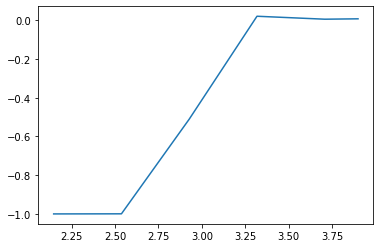

-0.9997804470121101


In [332]:
particle_id = 2
df_snap_1= df_snap[df_snap['particle']==particle_id]
plt.plot(df_snap_1['xend'], df_snap_1['Szend'])
plt.show()
print(df_end[df_end['particle']==particle_id]['Szend'].item())

1154 particles with average S_z = -0.9908298043515849
Magnetic field Max: 2.2148709108697304e-05   Min: 1.7777569740959803e-05   Mean: 2.1042715744060546e-05


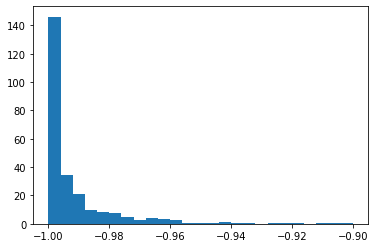

In [333]:
df_end_ab = df_end[df_end['stopID']==1]
print('{} particles with average S_z = {}'.format(len(df_end_ab), df_end_ab['Szend'].mean()))
print('Magnetic field Max: {}   Min: {}   Mean: {}'.format(df_end_ab['Bend'].max(), df_end_ab['Bend'].min(), df_end_ab['Bend'].mean()))

plt.hist(df_end_ab['Szend'], range=(-1.0,-.9), bins=25, density=True)
plt.show()

In [334]:
spin_files = glob('*spin.out')
df_spin = pd.concat([pd.read_csv(file, sep=' ') for file in spin_files], ignore_index=True)

if len(spin_files) > 1:
    df_spin['particle'] = df_spin['particle']+df_spin['jobnumber']*df_spin['particle'].max()
df_spin.head()

,jobnumber,particle,t,x,y,z,Sx,Sy,Sz,Wx,Wy,Wz,Bx,By,Bz
0,0,1,0.000000,3.897597,-0.018097,0.212166,0.004831,-0.999986,0.001982,-20.670412,4278.976235,-8.481504,-1.128007e-07,0.000023,-4.628450e-08
1,0,1,0.100009,3.869472,0.003933,0.231314,-0.000102,-0.999983,0.005896,3.505762,4246.453560,-16.096836,1.913133e-08,0.000023,-8.784220e-08
2,0,1,0.200007,3.841351,0.002536,0.236460,0.000110,-1.000000,0.000243,2.388195,4222.758201,-17.855956,1.303264e-08,0.000023,-9.744191e-08
3,0,1,0.300002,3.739836,-0.018186,0.211027,0.004316,-0.999990,-0.001293,-6.803495,4175.169627,-12.997567,-3.712742e-08,0.000023,-7.092915e-08
4,0,1,0.400002,3.353332,0.012072,0.223332,0.003361,-0.999904,0.013452,-4.262205,4145.864171,-72.100180,-2.325932e-08,0.000023,-3.934586e-07


In [335]:
df_spin['pol'] = df_spin.apply(lambda row: np.dot( row[['Sx','Sy','Sz']], row[['Bx','By','Bz']] ) / np.linalg.norm( row[['Bx','By','Bz']] ) , axis=1)

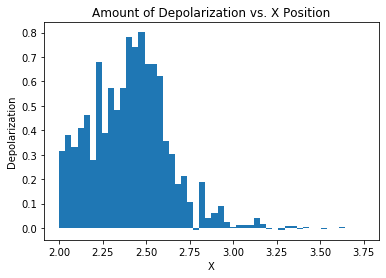

In [336]:
fig, ax = plt.subplots(1)

ax.set_title('Amount of Depolarization vs. X Position')
ax.set_xlabel('X')
ax.set_ylabel('Depolarization')
ax.hist(df_spin['x'],weights=df_spin['pol'].diff().fillna(0), bins=50, range=(2,3.75))
ax.ticklabel_format(style='sci',useOffset=False)
ax.set_xticks(np.arange(2,4,.25))

plt.show()

In [337]:
df_spin_final = df_spin[df_spin['x']<=2.02]
df_spin_final.head()

,jobnumber,particle,t,x,y,z,Sx,Sy,Sz,Wx,Wy,Wz,Bx,By,Bz,pol
85,0,4,0.700002,2.014077,-0.009318,0.213977,0.036910,-0.010952,-0.999259,-28.390306,-45.869254,3852.072505,-1.549290e-07,-2.503136e-07,0.000021,-0.999302
427,0,11,2.100004,2.016989,-0.025931,0.244886,-0.030825,0.017037,-0.999380,14.902127,-34.223022,4040.848334,8.132254e-08,-1.867588e-07,0.000022,-0.999595
1049,0,31,2.500006,2.010444,-0.018407,0.208788,0.011382,0.072696,-0.997289,-37.153695,-65.799358,3769.840990,-2.027518e-07,-3.590743e-07,0.000021,-0.998470
2274,0,54,2.900005,2.015328,-0.029775,0.228567,-0.048041,-0.019327,-0.998658,-2.511147,-75.909453,3922.842356,-1.370361e-08,-4.142462e-07,0.000021,-0.998067
2853,0,61,3.800002,2.015748,0.018707,0.260079,0.032185,0.049938,-0.998234,29.424542,-52.089729,3784.746804,1.605730e-07,-2.842594e-07,0.000021,-0.998546
